<a href="https://colab.research.google.com/github/ACDalmacio/Final-Exam-Model-Deployment-in-the-Cloud/blob/main/Final_Exam_Model_Deployment_in_the_Cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#import libraries
import numpy as np
import pandas as pd
from pandas import datetime
from matplotlib import pyplot
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [10]:
#load the dataset
def parser(x):
	return datetime.strptime(x, '%Y-%m')
 
series = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/DATA/data.csv',  header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())

Month
1965-01-01    319.32
1965-02-01    320.36
1965-03-01    320.82
1965-04-01    322.06
1965-05-01    322.17
Name: CO2 (ppm), dtype: float64


# **Visualize Time Series**

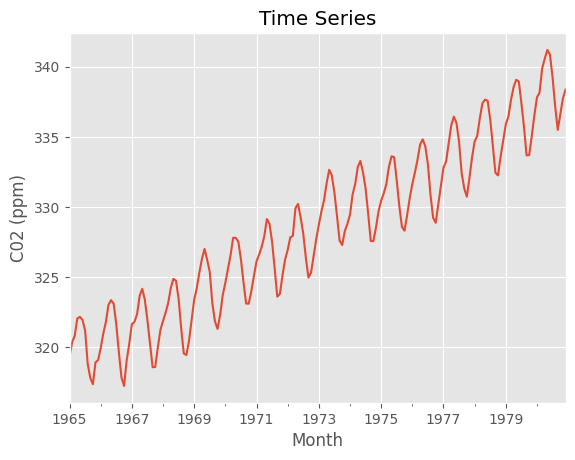

In [11]:
pyplot.style.use('ggplot')

series.plot()

pyplot.title('Time Series')
pyplot.xlabel('Month')
pyplot.ylabel('C02 (ppm)')

pyplot.show()

***Autocorrelation Plot***

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

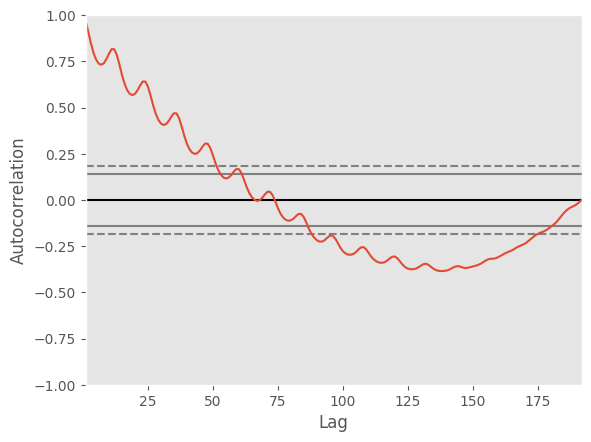

In [12]:
#autocorrelation plot
from pandas.plotting import autocorrelation_plot

pyplot.style.use('ggplot')
autocorrelation_plot(series)

# **Fit an ARIMA Model (baseline model order = (1,1,1))**

In [13]:
# fit an ARIMA model
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(series, order=(1,1,1))
model_fit = model.fit()

# summary of fit model
print(model_fit.summary())

import warnings
warnings.filterwarnings("ignore")

                               SARIMAX Results                                
Dep. Variable:              CO2 (ppm)   No. Observations:                  192
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -225.819
Date:                Tue, 16 May 2023   AIC                            457.638
Time:                        11:22:40   BIC                            467.395
Sample:                    01-01-1965   HQIC                           461.590
                         - 12-01-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5590      0.087      6.441      0.000       0.389       0.729
ma.L1          0.3307      0.092      3.613      0.000       0.151       0.510
sigma2         0.6202      0.071      8.704      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


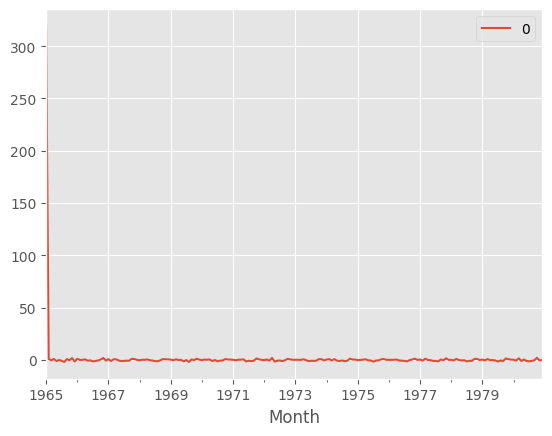

In [14]:
# line plot of residuals
from pandas import DataFrame

pyplot.style.use('ggplot')

residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

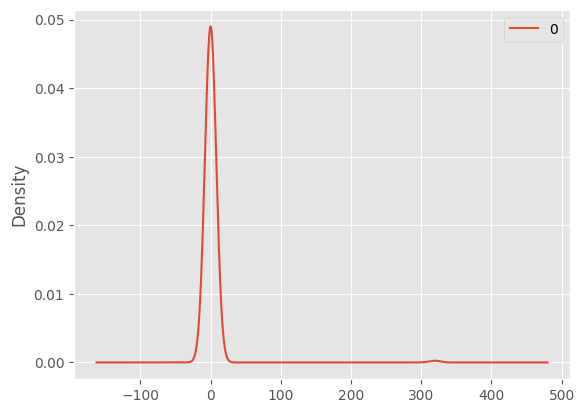

In [15]:
# density plot of residuals
pyplot.style.use('ggplot')

residuals.plot(kind='kde')
pyplot.show()

In [16]:
# summary stats of residuals
print(residuals.describe())

                0
count  192.000000
mean     1.698162
std     23.055889
min     -1.760398
25%     -0.571139
50%      0.034938
75%      0.566208
max    319.320000
